In [2]:
# Ensure TensorFlow is installed
%pip install tensorflow

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


2025-04-15 07:04:29.756734: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-15 07:04:30.001303: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-15 07:04:30.141622: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744700670.427941   55928 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744700670.506649   55928 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1744700671.484043   55928 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [3]:
%pip install opencv-python
%pip install imutils
import numpy as np 
from tqdm import tqdm
import cv2
import os
import imutils


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [4]:
def crop_img(img):
	"""
	Finds the extreme points on the image and crops the rectangular out of them
	"""
	gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
	gray = cv2.GaussianBlur(gray, (3, 3), 0)

	# threshold the image, then perform a series of erosions +
	# dilations to remove any small regions of noise
	thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
	thresh = cv2.erode(thresh, None, iterations=2)
	thresh = cv2.dilate(thresh, None, iterations=2)

	# find contours in thresholded image, then grab the largest one
	cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
	cnts = imutils.grab_contours(cnts)
	c = max(cnts, key=cv2.contourArea)

	# find the extreme points
	extLeft = tuple(c[c[:, :, 0].argmin()][0])
	extRight = tuple(c[c[:, :, 0].argmax()][0])
	extTop = tuple(c[c[:, :, 1].argmin()][0])
	extBot = tuple(c[c[:, :, 1].argmax()][0])
	ADD_PIXELS = 0
	new_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()
	
	return new_img

In [5]:
training = "../Dataset/Training"
testing = "../Dataset/Testing"
training_dir = os.listdir(training)
testing_dir = os.listdir(testing)
IMG_SIZE = 256

for dir in training_dir:
	save_path = 'cleaned/Training/'+ dir
	path = os.path.join(training,dir)
	image_dir = os.listdir(path)
	for img in image_dir:
		image = cv2.imread(os.path.join(path,img))
		new_img = crop_img(image)
		new_img = cv2.resize(new_img,(IMG_SIZE,IMG_SIZE))
		if not os.path.exists(save_path):
			os.makedirs(save_path)
		cv2.imwrite(save_path+'/'+img, new_img)

for dir in testing_dir:
	save_path = 'cleaned/Testing/'+ dir
	path = os.path.join(testing,dir)
	image_dir = os.listdir(path)
	for img in image_dir:
		image = cv2.imread(os.path.join(path,img)) 
		new_img = crop_img(image)		
		new_img = cv2.resize(new_img,(IMG_SIZE,IMG_SIZE))
		if not os.path.exists(save_path):
			os.makedirs(save_path)
		cv2.imwrite(save_path+'/'+img, new_img)

In [6]:
import pandas as pd 

def train_df(tr_path):
    classes, class_paths = zip(*[(label, os.path.join(tr_path, label, image))
                                 for label in os.listdir(tr_path) if os.path.isdir(os.path.join(tr_path, label))
                                 for image in os.listdir(os.path.join(tr_path, label))])

    data = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return data

def test_df(ts_path):
    classes, class_paths = zip(*[(label, os.path.join(ts_path, label, image))
                                 for label in os.listdir(ts_path) if os.path.isdir(os.path.join(ts_path, label))
                                 for image in os.listdir(os.path.join(ts_path, label))])

    data = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return data

In [7]:
train = train_df('cleaned/Training')
test = test_df('cleaned/Testing')

In [8]:
test, train

(                                      Class Path       Class
 0      cleaned/Testing/meningioma/Te-me_0107.jpg  meningioma
 1      cleaned/Testing/meningioma/Te-me_0203.jpg  meningioma
 2      cleaned/Testing/meningioma/Te-me_0236.jpg  meningioma
 3      cleaned/Testing/meningioma/Te-me_0024.jpg  meningioma
 4      cleaned/Testing/meningioma/Te-me_0266.jpg  meningioma
 ...                                          ...         ...
 1306    cleaned/Testing/pituitary/Te-pi_0162.jpg   pituitary
 1307    cleaned/Testing/pituitary/Te-pi_0209.jpg   pituitary
 1308    cleaned/Testing/pituitary/Te-pi_0148.jpg   pituitary
 1309    cleaned/Testing/pituitary/Te-pi_0067.jpg   pituitary
 1310  cleaned/Testing/pituitary/Te-piTr_0007.jpg   pituitary
 
 [1311 rows x 2 columns],
                                       Class Path       Class
 0     cleaned/Training/meningioma/Tr-me_0960.jpg  meningioma
 1     cleaned/Training/meningioma/Tr-me_1043.jpg  meningioma
 2     cleaned/Training/meningioma/Tr-me_1

/tmp/ipykernel_55928/747699126.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=train , y=train['Class'], palette='coolwarm')


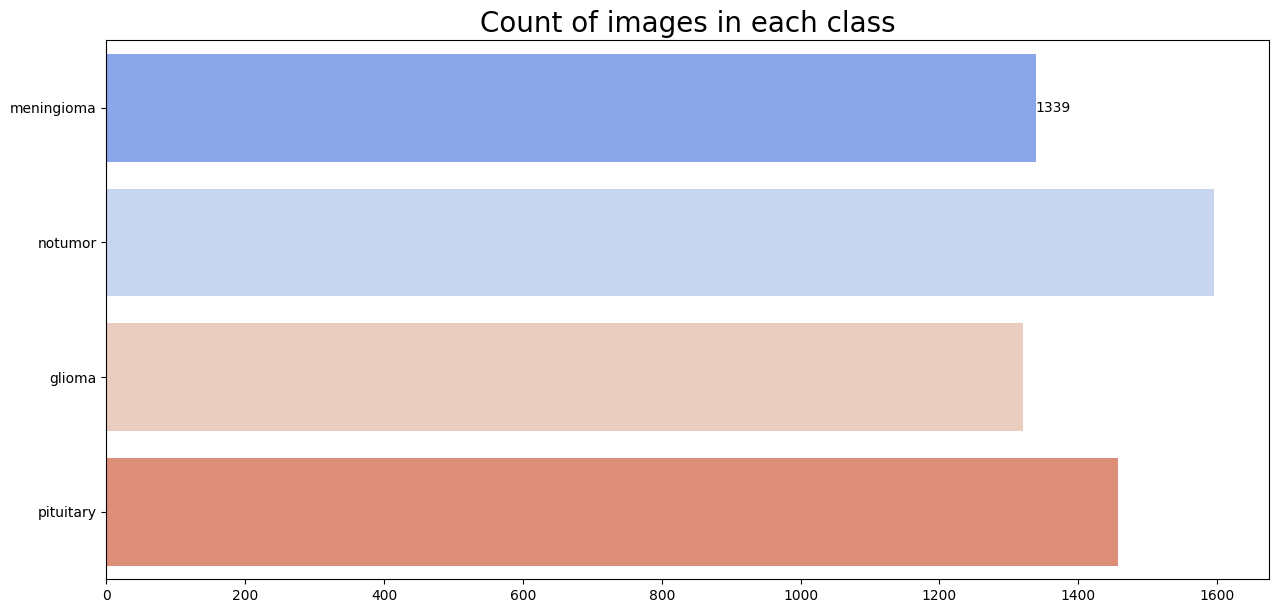

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of images in each class in train data
plt.figure(figsize=(15,7))
ax = sns.countplot(data=train , y=train['Class'], palette='coolwarm')

plt.xlabel('')
plt.ylabel('')
plt.title('Count of images in each class', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()

/tmp/ipykernel_55928/3099283385.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=test['Class'], palette='coolwarm')


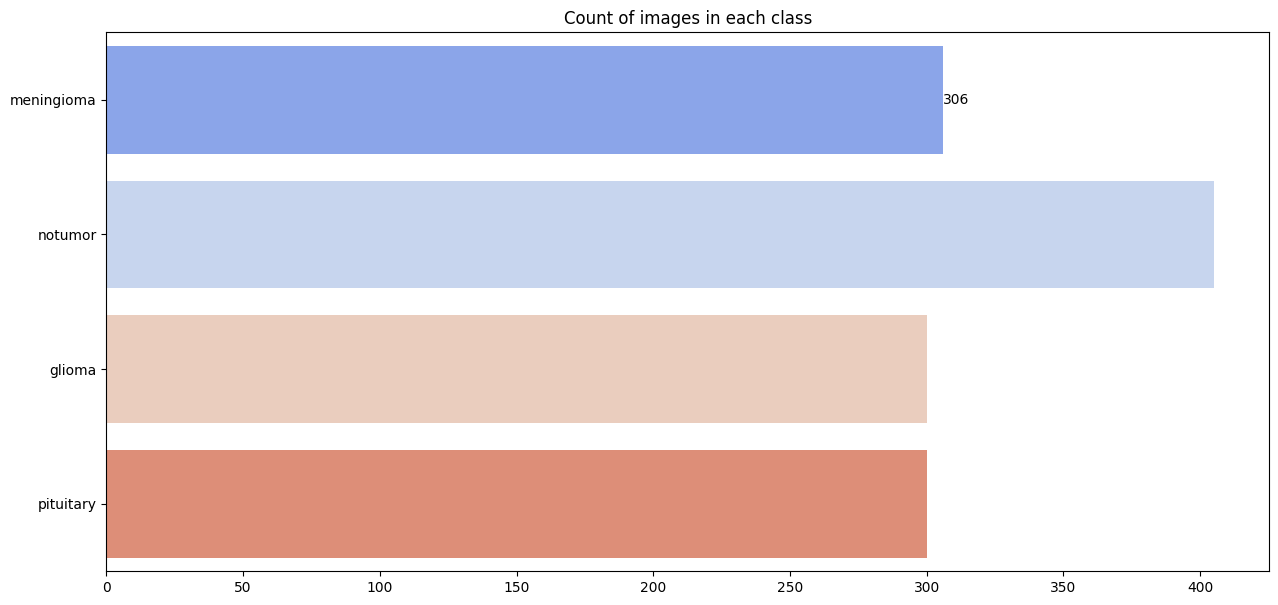

In [10]:
#Count each class in test data
plt.figure(figsize=(15, 7))
ax = sns.countplot(y=test['Class'], palette='coolwarm')

ax.set(xlabel='', ylabel='', title='Count of images in each class')
ax.bar_label(ax.containers[0])

plt.show()

In [11]:
from sklearn.model_selection import train_test_split
valid, test = train_test_split(test, train_size=0.5, random_state=20, stratify=test['Class'])

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
batch_size = 32
img_size = (256, 256)

generator = ImageDataGenerator(rescale=1/255,
                          brightness_range=(0.8, 1.2))



training = generator.flow_from_dataframe(train, x_col='Class Path',
                                  y_col='Class', batch_size=batch_size,
                                  target_size=img_size)

validation = generator.flow_from_dataframe(valid, x_col='Class Path',
                                     y_col='Class', batch_size=batch_size,
                                     target_size=img_size)

testing = generator.flow_from_dataframe(test, x_col='Class Path',
                                  y_col='Class', batch_size=16,
                                  target_size=img_size, shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


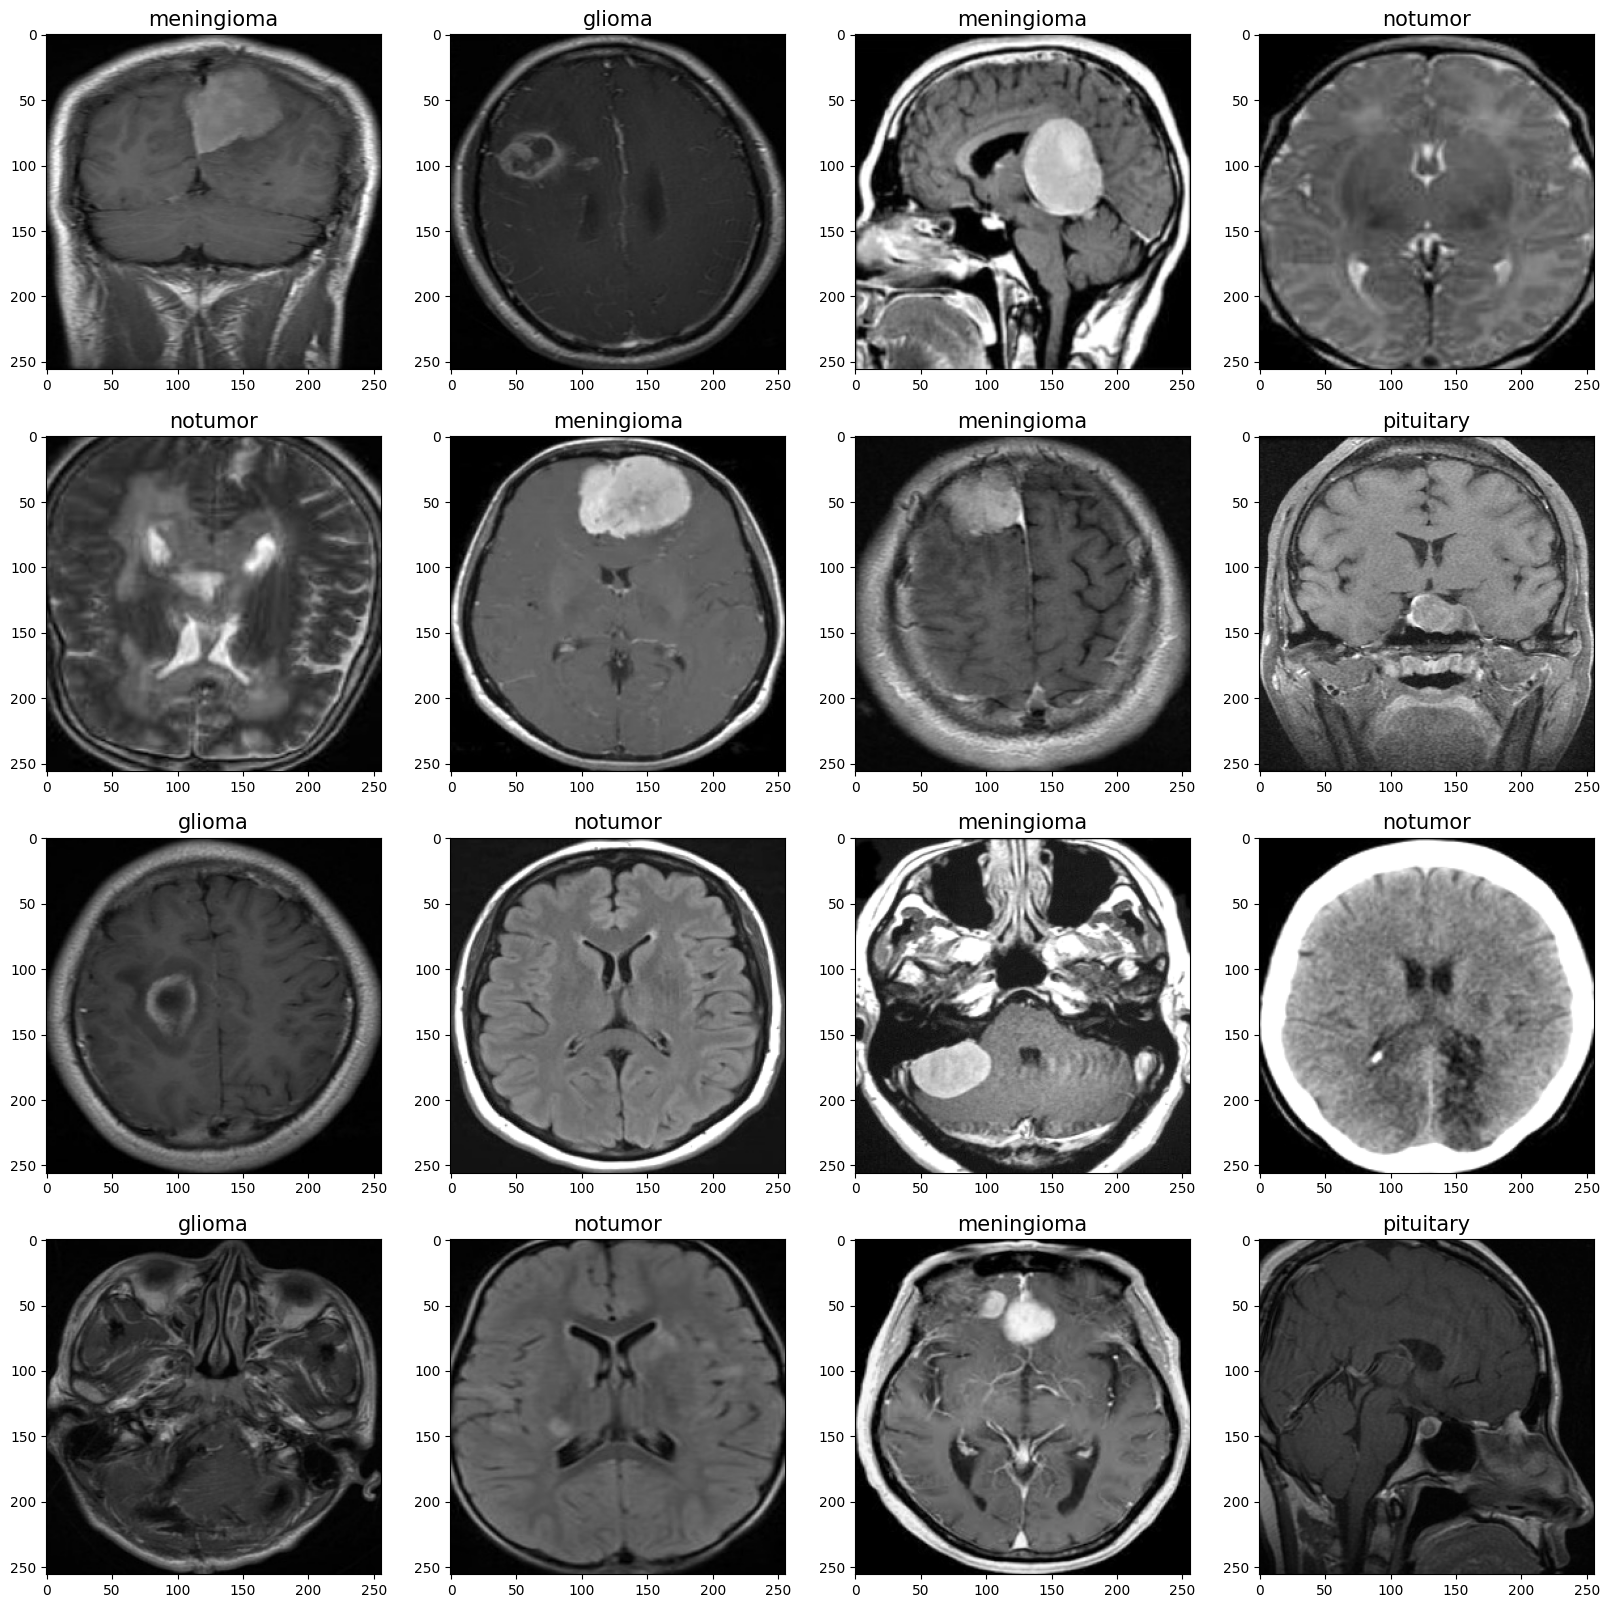

In [14]:
class_dict = training.class_indices
classes = list(class_dict.keys())
images, labels = next(testing)

plt.figure(figsize=(20, 20))

for i, (image, label) in enumerate(zip(images, labels)):
    plt.subplot(4,4, i + 1)
    plt.imshow(image)
    class_name = classes[np.argmax(label)]
    plt.title(class_name, color='k', fontsize=15)

plt.show()

In [15]:
img_shape=(256,256,3)
base_model = tf.keras.applications.Xception(include_top= False, weights= "imagenet",
                            input_shape= img_shape, pooling= 'max')

# for layer in base_model.layers:
#     layer.trainable = False
    
model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate= 0.3),
    Dense(128, activation= 'relu'),
    Dropout(rate= 0.25),
    Dense(4, activation= 'softmax')
])

model.compile(Adamax(learning_rate= 0.001),
              loss= 'categorical_crossentropy',
              metrics= ['accuracy',
                        Precision(),
                        Recall()])

model.summary()

2025-04-15 07:05:22.574470: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ (None, 2048)           │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,124,268 (80.58 MB)

 Trainable params: 21,069,740 (80.37 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


: 

In [ ]:
history = model.fit(training,
                 epochs=10,
                 validation_data=validation,
                 shuffle= False)

/home/codespace/.python/current/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


2025-04-15 07:05:47.516965: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 25165824 exceeds 10% of free system memory.
2025-04-15 07:05:47.560321: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 66064384 exceeds 10% of free system memory.
2025-04-15 07:05:47.749822: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 25165824 exceeds 10% of free system memory.
2025-04-15 07:05:47.893638: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 66064384 exceeds 10% of free system memory.
2025-04-15 07:05:47.959020: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 66064384 exceeds 10% of free system memory.
2025-04-15 07:05:47.749822: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 25165824 exceeds 10% of free system memory.
2025-04-15 07:05:47.893638: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] A